# Turbulence! 
Modern passenger airplanes are equipped with autopilot (AP) computer systems. These AP systems help reduce the cognitive and physical workload of pilots, which have directly allowed us to fly much farther than without them. 

Like a pilot, the AP has to "understand" a large number of instrument measurements mid-flight in order to arrive at reasonable set of corrective actions. Here we will consider a simple model that helps stabilize the altitude of a plane when it encounters turbulence.  

### Consider the airplane in the cartoon below, which travels in a 2-dimensional (2D) $xz$ plane. 

<div>
    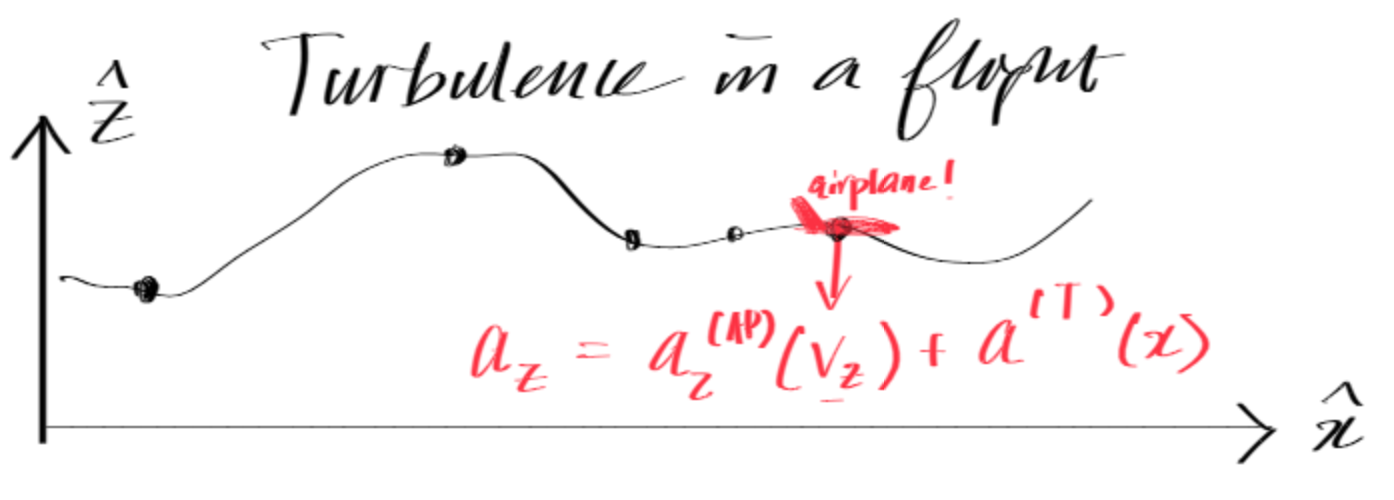
</div>

### Your goal: help a passenger infer turbulence parameters with a phone?
Air turbulence can be nerve-wrecking to a passenger. One such passenger decided to combat his fear with knowledge. He figured that if he could mathematically model his encounter with air turbulence pockets, he could try to predict when a bout of turbulence ends. So he remembers that he could measure instantaneous accelerations (at 10 ms intervals) using his phone's accelerometer. Flesh out the steps below to help this nervous traveler! 

- [Mathematical model of altitude control by an aircraft's AP](#acc_ap). 

- [Mathematical model of aircraft accelerations due to turbulence](#acc_turb). This model includes turbulence parameters such as spatial variations in air density.

- [Predict a trajectory using his model](#pred_traj).

- Obtain regular measurements of an aircraft's vertical accelerations using his phone's accelerometer.

- Fit his model's predicted acceleration trajectory to those measured by his phone, thereby inferring the hidden turbulence parameters of his model.

### Modeling a simple feedback to stabilize $u_z$.
<a id='acc_ap'></a>
- With readouts from accelerometers, the plane is able to infer the $z$ component of the velocity, $u_z(t)$, in regular $\Delta t = 0.01$ s intervals.
- Suppose that during "cruise mode", the AP is programmed to damp out any unwanted accelerations in $z$. Explicitly, the AP takes a series of instantaneous maneuvers that result in the following deceleration:
$$a_z^{(AP)}(t) = -\alpha \, u_z(t-\Delta t), $$ where $\alpha = 0.2 \,\text{s}^{-1}$. As you can see, this program results in a compensatory $z$ deceleration that eventually dampens the aircraft's $|u_z|$. 
- You will implement this model in this homework as `acceleration_ap(vz)`.

<div>
    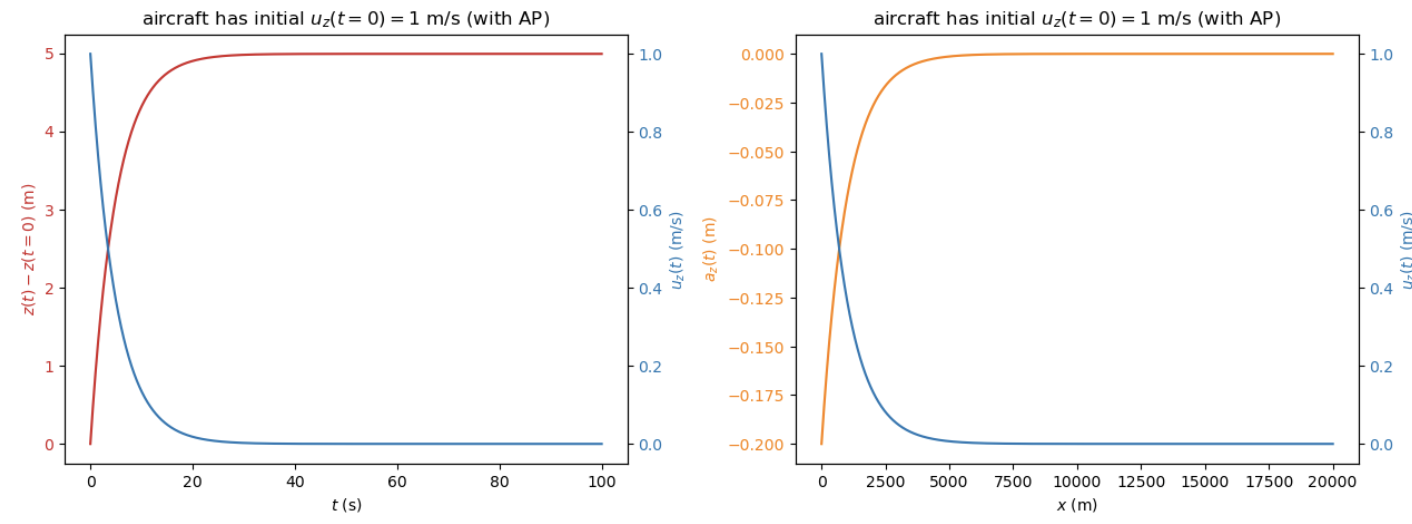
</div>

### Modeling an aircraft's turbulence encounter (density variations in the air)!
<a id='acc_turb'></a>

- Let's make a few more simplifying boundary conditions. 
    * First, assume that the aircraft encounters turbulence only at $t=0$.
    * Further, $u_z(t=0) = 0 \, \text{m/s}$ (i.e., aircraft does not have any initial $z$ velocity).
    * You may also assume that $z(t=0) = 10000$ m, although this assumption is inconsequential for this question. 
    * For simplicity, assume that the AP maintains the $x$ component of the speed perfectly constant at $$u_x = 200 \, \text{m/s}.$$ For the purposes of this exercise, you may assume that this $u_x$ is measured from the reference frame of a stationary observer on Earth. 
    * You can also assume that there is no head wind or tail wind acting the aircraft.
    
- These density variations, which could be due to clouds, will result in an overall acceleration which we parametrically model as $$a_z^{(T)}(x; g_1, \lambda, r) = g_1 \exp{\left(-\frac{x}{r \lambda} \right)} \sin{\left( 2 \pi x / \lambda\right)} \,,$$ where $x$ denotes the position of the aircraft along the $\hat{x}$ direction.
- The figure below shows what happens when the aircraft encounters turbulence at $t=0$. 
    * For reference we show this with and without AP. **Without AP, any residual $u_z$ is clearly not damped away, and the aircraft continues to drift up/down** even after the turbulence as passed.
    
- You will implement this model in this homework as `acceleration_turb(x, g1, l1, r)`.

<div>
    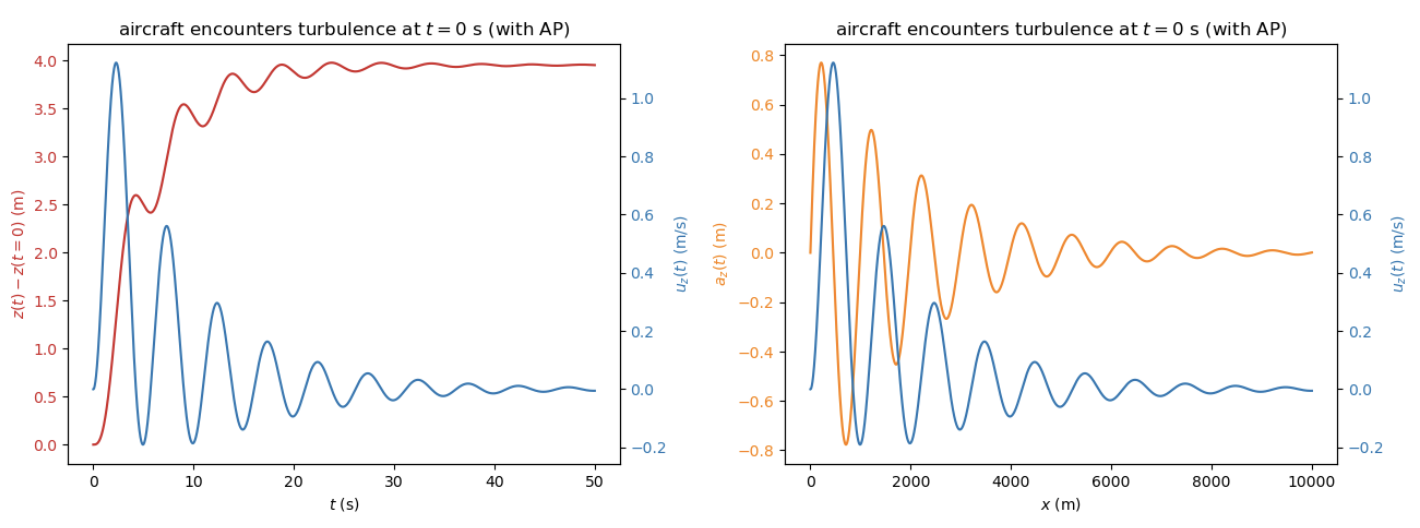
    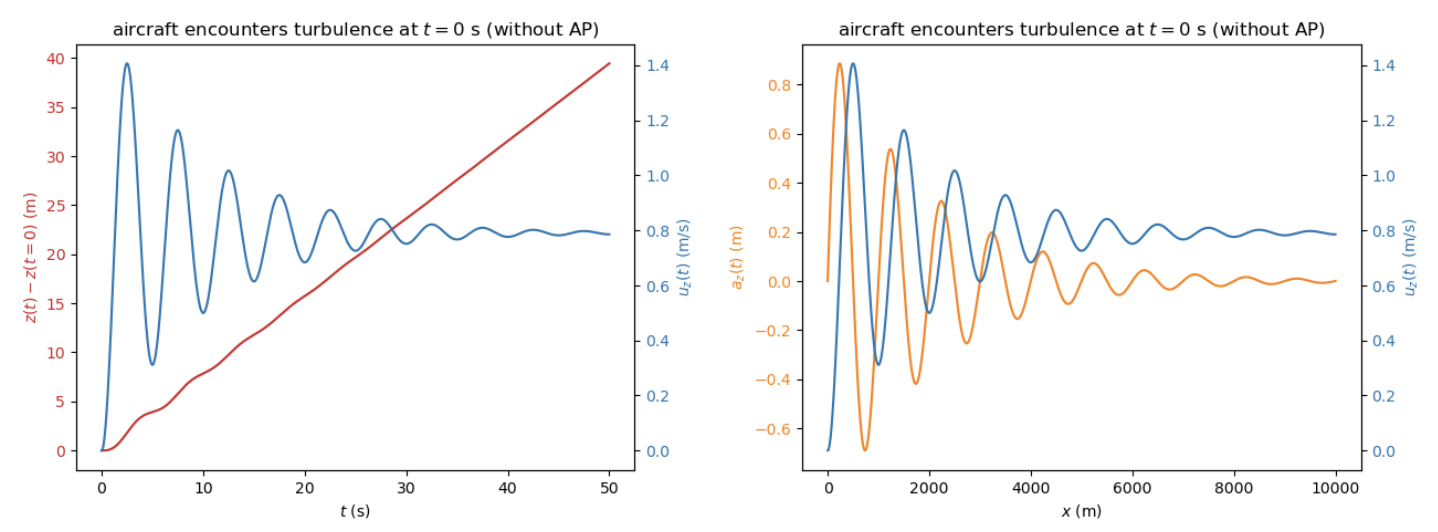
</div>


### Predict trajectory with difference equations with modified Euler's method.
<a id='pred_traj'></a>

Given a particular set of initial kinematic conditions we can use the turbulence and AP models above to compute the position, velocity, and acceleration of the aircraft forward in time. 

- You will implement this model in this homework as `compute_traj_test(...)`.

- Here are the initial conditions that we will assume for this homework.
$$\begin{align}
x(t=0) &= 0 \;, \\
z(t=0) &= 10000 \;,\\
u_x(t) &= 200 \text{ m/s} \;,\\
u_z(t=0) &= 0 \text{ m/s} \;, \\
\Delta t &= 0.01 \text{ s}\;.
\end{align}$$

- Here are the slightly modified difference equations that propagates these initial kinematic conditions forward in time.
$$\begin{align}
x(t) &= x(t=0) + u_x \, t \;, \\
a_z(t-\Delta t) &\triangleq a_z^{(AP)}(u_z(t- \Delta t)) + a_z^{(T)}(x(t- \Delta t)) \;,\\
u_z(t) &= a_z(t-\Delta t) \, \Delta t \;,\\
z(t) &= z(t-\Delta t) + 0.5(u_z(t) + u_z(t-\Delta t)) \, \Delta t \;.
\end{align}$$



---- 
# For this homework you need to submit two things: 

1. Upload onto Canvas, your `eXXXXXXXX.py` python script with three following functions (see below).

2. Answer the questions on Canvas quiz named "HW02Quiz", which pertain to the mystery dataset of $u_z(t)$ given here. In this quiz, [you are supposed to write down the most likely `g1`, `l1`, `r` parameters of the turbulence model above that best explains the $u_z(t)$ dataset.](#MysteryDataset) You will also need to submit an Jupyter notebook to show how you've arrived at your answers.


<div>
    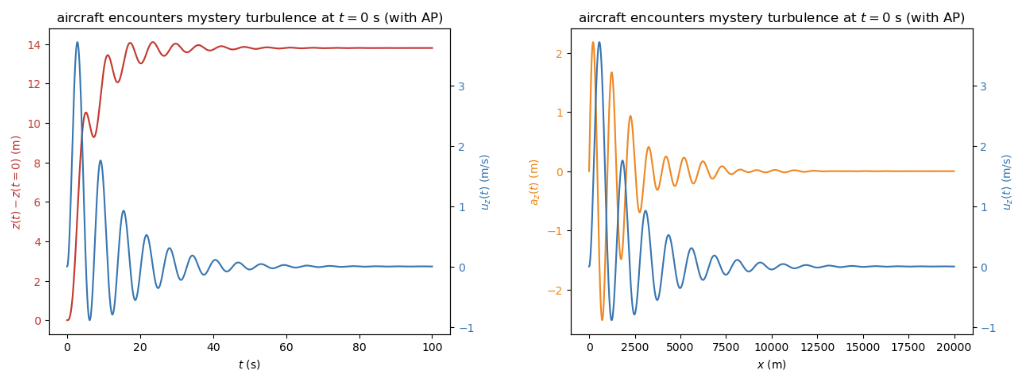
</div>

## Your python script must contain the following three functions.

```python
def acceleration_turb(x, g1, l1, r):
    """
    Computes the z acceleration on the aircraft due to turbulence.
    
    Parameters
    ------
    x: float
        x position of the aircraft
        
    g1: float
        magnitude of acceleration due to the turbulent pocket
        
    l1: float
        x-wavelength of the turbulent pocket
        
    r: float
        characteristic decay length of the pocket defined as r*l1.
        
    Returns
    ------
    acceleration: float
        z acceleration due to turbulence (positive z -> away from Earth)
        
    """
    Your code goes here.. 
```

```python
def acceleration_ap(uz, alpha=0.2):
    """
    Computes the z acceleration on the aircraft due to autopilot (AP).
    
    Parameters
    ------
    uz: float
        z component of aircraft's velocity (with respect to ground)

        
    Returns
    ------
    acceleration: float
        z acceleration due to autopilot (positive z -> away from Earth) 
        
    """
    Your code goes here..

```

```python
def compute_traj_test(in_acc_ap, in_acc_t, g1, l1, r, uz0=0,
                      alpha=0.2, t_steps=100, 
                      z0=10000, x0=0, ux=200, dt=0.01):
    """
    Computes the trajectory of an aircraft subjected to modeled turbulence
    and corrective autopilot (AP) maneuvers.
    
    This trajectory is propagated forward in time using the modified Euler's method,
    given the input functions for AP and turbulence. 
    
    Parameters
    ------
    in_acc_ap: function(uz, alpha)
        Function that computes the instantaneous AP acceleration given
        the following two input variables:
            - uz (current z component of aircraft speed) 
            
    in_acc_t: function(x, g1, l1, r):
        Computes the z acceleration on the aircraft due to turbulence.
            - x (x position of the aircraft).
    
    g1: float
        magnitude of acceleration due to the turbulent pocket.
        
    l1: float 
        x-wavelength of the turbulent pocket.
        
    r: float
        characteristic decay length of the pocket defined as r*l1.
        
    uz0: float
        initial z-component of velocity (defaults to 0 m/s).
        
    alpha: float
        corrective drag coefficient to slow aircraft down (defaults to 0.2 s^-1).
        
    t_steps: integer
        number of time steps in the trajectory (defaults to 100).
        
    dt: float
        time intervals between consecutive samples of the trajectory (defaults to 0.01 s).
        
    z0: float
        initial z position of aircraft at t=0 (defaults to 10000 m). 
        This parameter is used only if you choose to compute the z(t).
        
    x0: float
        initial x position of aircraft at t=0 (defaults to 0 m).

    ux: float
        constant x velocity of aircraft (defaults to 200 m/s)
        
    Returns
    ------
    uz_points: numpy array (floats) of length t_steps+1.
        This array comprising the z-component velocities
        of the aircraft sampled at every dt time intervals.
        
        Note: The first element of the array should be uz0.
        
    """
    Your code goes here... 

```

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Define function acceleration_ap(uz, alpha=0.2)

In [2]:
def acceleration_ap(uz, alpha=0.2):
    acc_ap = -alpha * uz
    return acc_ap

## Define function acceleration_turb(x, g1, l1, r)

In [3]:
def acceleration_turb(x, g1, l1, r):
    acc_t = g1 * np.exp(-x/(r*l1)) * np.sin(2*np.pi*x/l1)
    return acc_t

## Define function compute_traj_test

In [4]:
def compute_traj_test(g1, l1, r, uz0=0, alpha=0.2, t_steps=100, z0=10000, x0=0, ux=200, dt=0.01):
    t = np.arange(0, t_steps+dt, dt)
    acc0 = acceleration_ap(uz0, alpha) + acceleration_turb(x0, g1, l1, r)
    acc = ([acc0])
    uz = ([uz0])
    z = ([z0])
    x = ([x0])
    
    for i in np.arange(1, t_steps*100+1, 1):
        x = np.append(x, x[i-1]+ux*dt)
        uz = np.append(uz, uz[i-1]+acc[i-1]*dt)
        z = np.append(z, z[i-1]+0.5*(uz[i]+uz[i-1])*dt)
        acc = np.append(acc, acceleration_ap(uz[i-1], alpha)+acceleration_turb(x[i-1], g1, l1, r))
    return uz
        

----
# Mystery dataset. 
<a id='MysteryDataset'></a>
Can you figure out the `g1`, `l1`, and `r` of the turbulence model in this dataset?
Hint: think of a loss function between the predictions of your `compute_traj_test` function above and the actual measured $u_z(t)$ dataset. 

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
%matplotlib inline

Text(0.5, 0, '$t$ (s)')

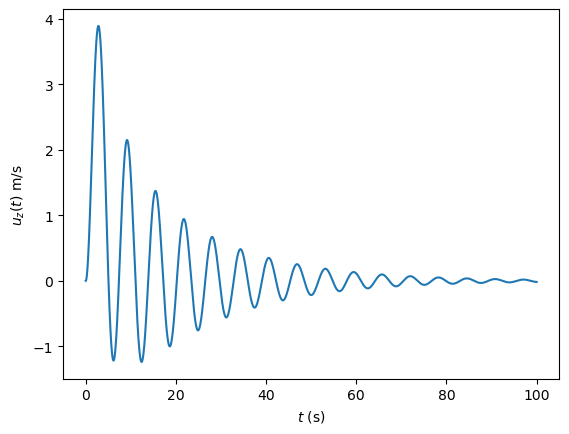

In [6]:
with h5py.File("HW02_mysterydata.h5", 'r') as fp:
    ts = fp["ts"][:]
    uzs = fp["uzs"][:]

plt.plot(ts, uzs)
plt.ylabel(f"$u_z(t)$ m/s")
plt.xlabel(f"$t$ (s)")

## Use MSE to get the parameters

In [9]:
import numpy as np
from scipy.optimize import minimize

def loss_function(params, *args):
    g1, l1, r = params
    uz0, alpha, t_steps, z0, x0, ux, dt = args
    uz_pred = compute_traj_test(g1, l1, r, uz0, alpha, t_steps, z0, x0, ux, dt)
    #print(uz_pred.shape)
    return np.mean((uz_pred - uzs)**2)  # MSE loss

# Initial guess for parameters
initial_guess = [3.5, 1000, 1]

# Minimize the loss function
result = minimize(loss_function, initial_guess, args=( 0, 0.2, 100, 10000, 0, 200, 0.01))  #uz0=0, alpha=0.2, t_steps=100, z0=10000, x0=0, ux=200, dt=0.01

# Extract the optimized parameters
g1_opt, l1_opt, r_opt = result.x

print("Optimized parameters:")
print(f"g1: {g1_opt}")
print(f"l1: {l1_opt}")
print(f"r: {r_opt}")


Optimized parameters:
g1: 2.7775650768333593
l1: 1254.383046452832
r: 3.1392898825778337


In [27]:
g1_opt_round = round(g1_opt,2)
l1_opt_round = "{:.4g}".format(l1_opt)
r_opt_round = round(r_opt,2)
print("Optimized parameters:")
print(f"g1: {g1_opt_round}")
print(f"l1: {l1_opt_round}")
print(f"r: {r_opt_round}")

Optimized parameters:
g1: 2.78
l1: 1254
r: 3.14


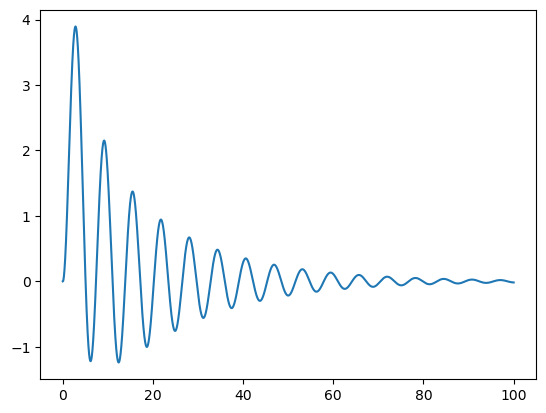

In [29]:
uz = compute_traj_test(g1_opt, l1_opt, r_opt, uz0=0, alpha=0.2, t_steps=100, z0=10000, x0=0, ux=200, dt=0.01)
t_steps = 100
dt = 0.01
t = np.arange(0, t_steps+dt, dt)
plt.plot(t, uz)


In [32]:
t = np.arange(0, t_steps+dt, dt)
uz0 = 0
alpha = 0.2
x0 = 0
z0 = 10000
ux = 200
acc0 = acceleration_ap(uz0, alpha) + acceleration_turb(x0, g1_opt, l1_opt, r_opt)
acc = ([acc0])
uz = ([uz0])
z = ([z0])
x = ([x0])

for i in np.arange(1, t_steps*100+1, 1):
    x = np.append(x, x[i-1]+ux*dt)
    uz = np.append(uz, uz[i-1]+acc[i-1]*dt)
    z = np.append(z, z[i-1]+0.5*(uz[i]+uz[i-1])*dt)
    acc = np.append(acc, acceleration_ap(uz[i-1], alpha)+acceleration_turb(x[i-1], g1=g1_opt, l1=l1_opt, r=r_opt))

## The final results

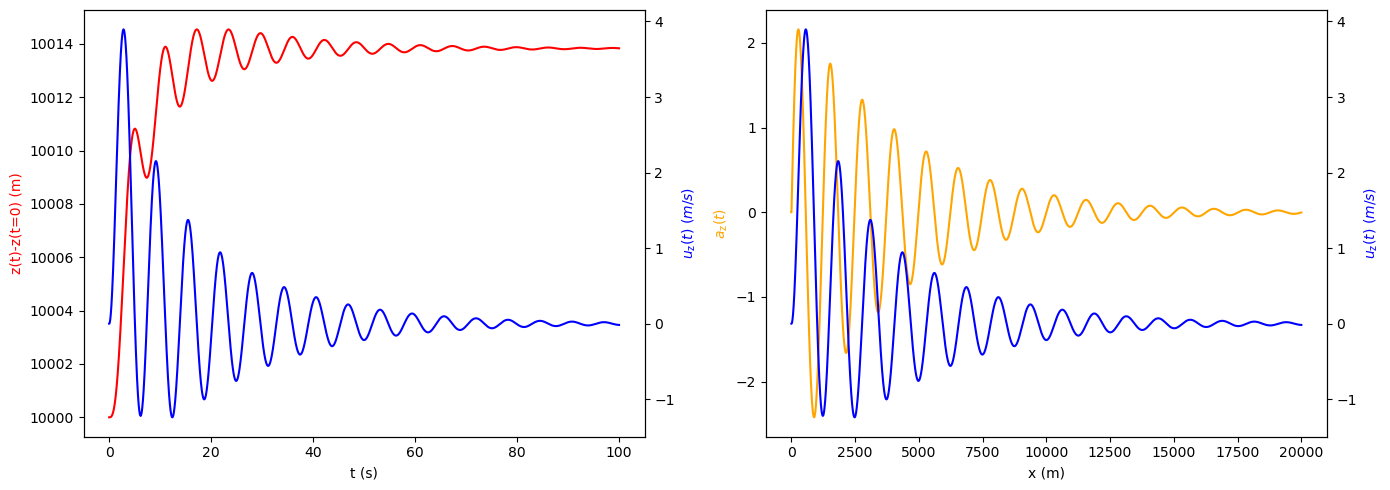

In [33]:
import matplotlib.pyplot as plt

# 创建一个新的图形窗口，并添加两个子图，排列在一行两列的网格中
plt.figure(figsize=(14, 5))  # 设置图形窗口的大小

# 第一个子图：左侧
plt.subplot(1, 2, 1)  # 在一行两列的网格中，添加第一个子图

# 创建图形和轴对象
ax1 = plt.gca()

# 绘制第一个数据集和轴
ax1.plot(t, z, 'red')
ax1.set_xlabel('t (s)', color='black')
ax1.set_ylabel('z(t)-z(t=0) (m)', color='red')

# 创建第二个轴并共享 X 轴
ax2 = ax1.twinx()
ax2.plot(t, uz, 'b-')
ax2.set_ylabel('$u_{\mathrm{z}}(t)~(m/s)$', color='blue')

# 第二个子图：右侧
plt.subplot(1, 2, 2)  # 在一行两列的网格中，添加第二个子图

# 创建图形和轴对象
ax3 = plt.gca()

# 绘制第一个数据集和轴
ax3.plot(x, acc, 'orange')
ax3.set_xlabel('x (m)', color='black')
ax3.set_ylabel('$a_{\mathrm{z}}(t)$', color='orange')

# 创建第二个轴并共享 X 轴
ax4 = ax3.twinx()
ax4.plot(x, uz, 'blue')
ax4.set_ylabel('$u_{\mathrm{z}}(t)~(m/s)$', color='blue')

plt.tight_layout()  # 自动调整子图的位置，避免重叠

plt.show()  # 显示图形
